In [1]:
import pandas as pd
from liquidity_provider_hedge.lph_strategy import build_observations, EthereumUniswapV3Loader, LoaderType, THE_GRAPH_API_KEY, UTC, Observation
from datetime import datetime
import numpy as np
from typing import List

In [2]:
binance_ticker: str = 'ETHUSDT'
hyperliquid_ticker: str = 'ETH'
pool_address: str = '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8'

start_time = datetime(2022, 1, 1, tzinfo=UTC)
end_time = datetime(2025, 1, 1, tzinfo=UTC)
fidelity = 'hour'

token0_decimals, token1_decimals = EthereumUniswapV3Loader(
    THE_GRAPH_API_KEY, loader_type=LoaderType.CSV).get_pool_decimals(pool_address)


observations: List[Observation] = build_observations(
    binance_ticker=binance_ticker, hyperliquid_ticker=hyperliquid_ticker, pool_address=pool_address, api_key=THE_GRAPH_API_KEY,
    start_time=start_time, end_time=end_time, fidelity=fidelity
)

/Users/sellerbto/defi/.venv/lib/python3.12/site-packages/fractal/loaders/thegraph/uniswap_v3/uniswap_v3_pool.py:153: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self._data = self._data.resample('H').ffill()
/Users/sellerbto/defi/.venv/lib/python3.12/site-packages/fractal/loaders/thegraph/uniswap_v3/uniswap_v3_pool.py:153: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  self._data = self._data.resample('H').ffill()


In [3]:
observations[0]

Observation(timestamp=2022-08-23 00:00:00+00:00, states={'UNISWAP_V3': UniswapV3LPGlobalState(tvl=331354005.59874636, volume=3246887.621104665, fees=9740.662863313995, liquidity=1.2119267197519356e+19, price=1619.93), 'HEDGE': HyperLiquidGlobalState(mark_price=1619.93, funding_rate=0.0)})

In [13]:
rate = [(observations[i].timestamp, observations[i].states['HEDGE'].funding_rate) for i in range(len(observations))]

In [14]:
rate = pd.DataFrame(rate, columns=['timestamp', 'states'])
rate.set_index('timestamp', inplace=True)
rate = rate[rate['states'] != 0]

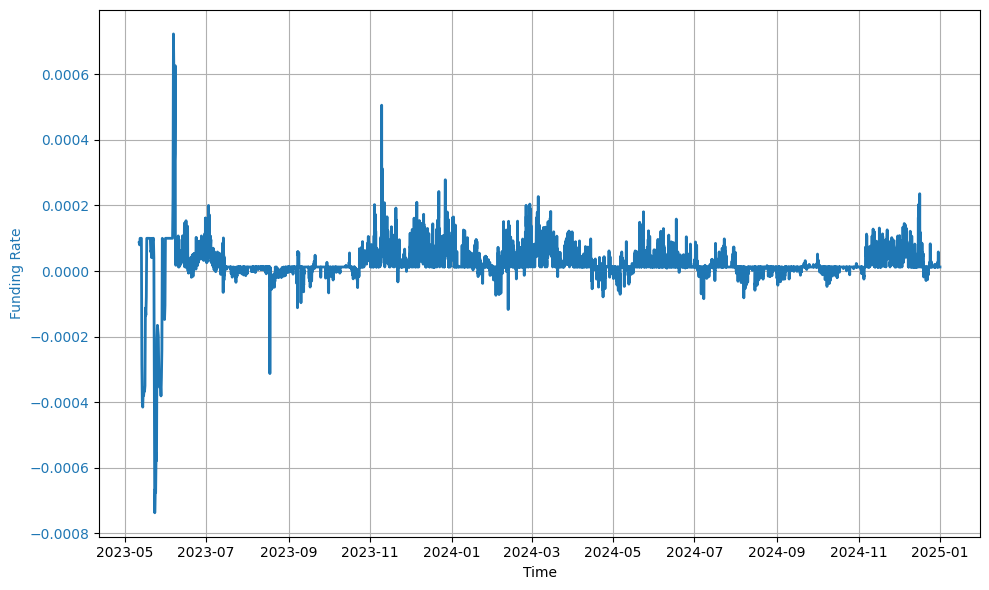

In [25]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(rate['states'], linewidth=2, label="Funding Rate", color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Funding Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.ticklabel_format(axis='y', style='plain')

ax1.grid(True)
fig.tight_layout()
plt.show()


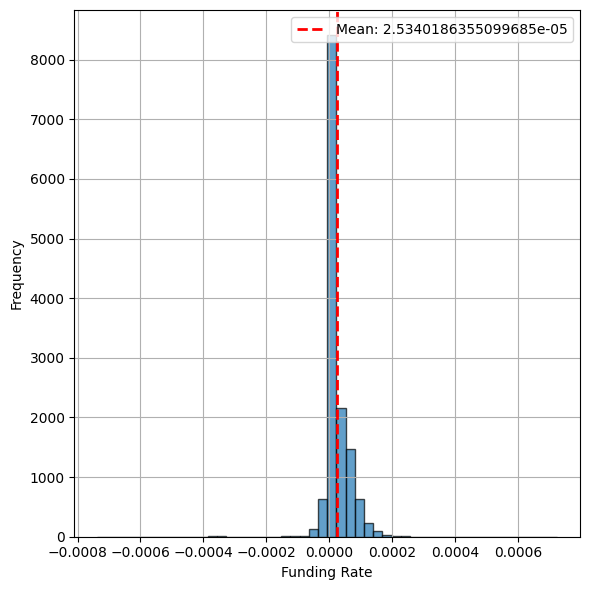

In [26]:
rates = rate['states']
fig, ax = plt.subplots(figsize=(6, 6))
n, bins, patches = ax.hist(rates, bins=50, edgecolor='black', alpha=0.7)
mean_rate = np.mean(rates)
ax.axvline(mean_rate, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_rate}')

ax.set_xlabel('Funding Rate')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.show()


In [29]:
eth_price = [(observations[i].timestamp, observations[i].states['UNISWAP_V3'].price) for i in range(len(observations))]

In [30]:
eth_price = pd.DataFrame(eth_price, columns=['timestamp', 'states'])
eth_price.set_index('timestamp', inplace=True)

In [27]:
data = pd.read_csv('/strategy_backtest_data.csv', parse_dates=['timestamp'], index_col='timestamp')

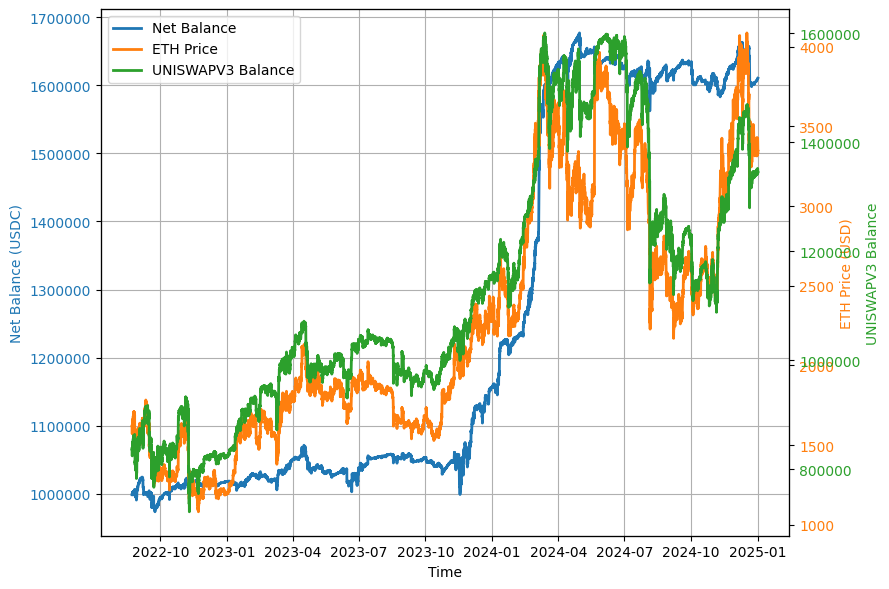

In [32]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(9, 6))

ax1.plot(data['net_balance'], linewidth=2, label="Net Balance", color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Net Balance (USDC)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.ticklabel_format(axis='y', style='plain')

ax2 = ax1.twinx()
ax2.plot(eth_price, linewidth=2, label="ETH Price", color='tab:orange')
ax2.set_ylabel('ETH Price (USD)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.ticklabel_format(axis='y', style='plain')

ax3 = ax1.twinx()
ax3.plot(data['UNISWAP_V3_balance'], linewidth=2, label="UNISWAPV3 Balance", color='tab:green')
ax3.set_ylabel('UNISWAPV3 Balance', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.ticklabel_format(axis='y', style='plain')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

ax1.grid(True)
fig.tight_layout()
plt.show()


In [23]:
data.iloc[-1]

HEDGE_collateral                  2.040650e+05
HEDGE_positions_0_amount         -1.286980e+02
HEDGE_positions_0_entry_price     3.353777e+03
HEDGE_positions_0_max_leverage    5.000000e+01
UNISWAP_V3_token0_amount          6.201859e+05
UNISWAP_V3_token1_amount          1.339812e+02
UNISWAP_V3_price_init             3.290480e+03
UNISWAP_V3_price_lower            3.025383e+03
UNISWAP_V3_price_upper            3.578806e+03
UNISWAP_V3_liquidity              1.257051e+18
UNISWAP_V3_cash                   3.804228e+04
HEDGE_mark_price                  3.336570e+03
HEDGE_funding_rate                1.250000e-05
UNISWAP_V3_tvl                    3.479435e+08
UNISWAP_V3_volume                 1.658717e+05
UNISWAP_V3_fees                   4.976150e+02
UNISWAP_V3_price                  3.336570e+03
HEDGE_balance                     2.062795e+05
UNISWAP_V3_balance                1.105266e+06
net_balance                       1.311545e+06
Name: 2024-12-31 23:00:00+00:00, dtype: float64